In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")

In [3]:
df.shape

(1000, 9)

In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [7]:
pd.isnull(df).sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [9]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [11]:
df[['Age','Quantity', 'Price per Unit', 'Total Amount']].describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


Text(0.5, 1.0, 'Customers total by Gender')

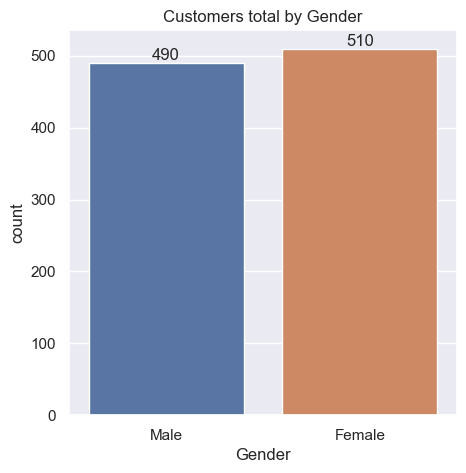

In [40]:
# plotting a bar chart for Gender and it's count 
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)
    
ax.set_title('Customers total by Gender')

From above graph we can see that company have more Female customers then Male

Text(0.5, 1.0, 'Revenue 2023 Generated by Gender')

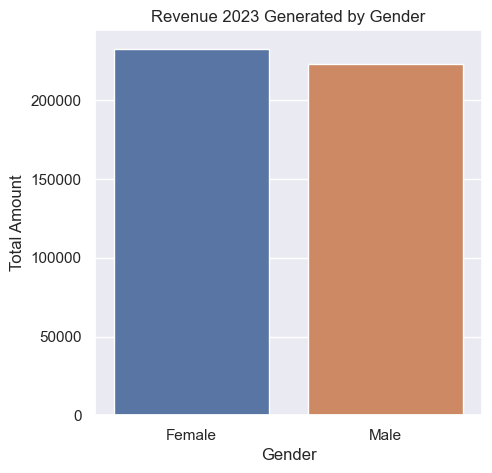

In [39]:
# plotting a bar chart for gender vs total amount 

sales_gen = df.groupby(['Gender'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)

sns.set(rc={'figure.figsize':(5,5)})

ax = sns.barplot(x = 'Gender',y = 'Total Amount', data = sales_gen)

ax.set_title('Revenue 2023 Generated by Gender')

From above graph Revanue of 2023 generated by Female most then male

Text(0.5, 1.0, 'Count of Age')

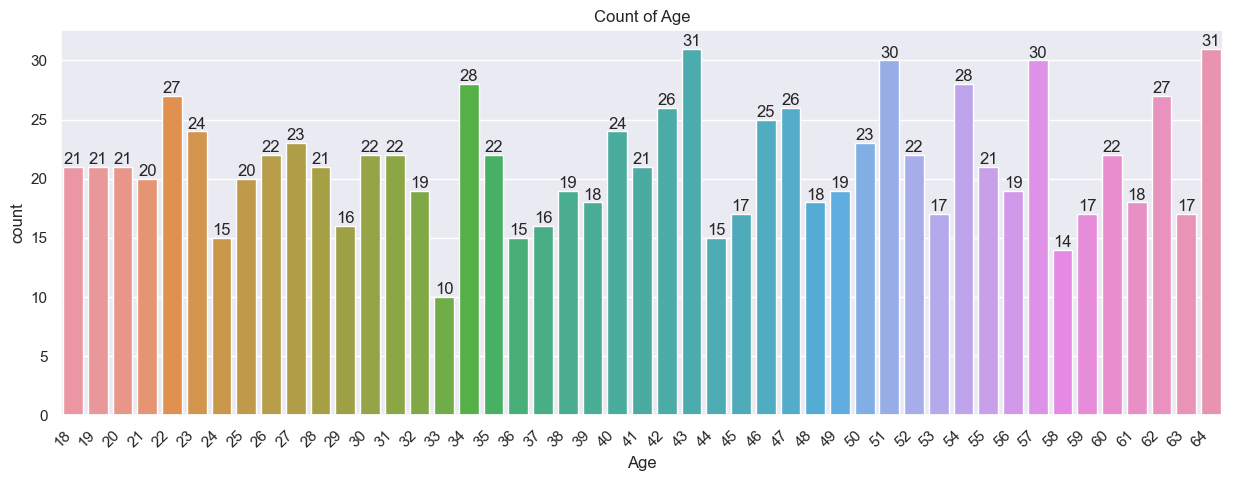

In [31]:
# plotting bar chart for Age Group and Gender

ax = sns.countplot(data = df, x = 'Age')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for bars in ax.containers:
    ax.bar_label(bars)
    
ax.set_title('Count of Age')

From above graph 43 and 64 aged customers done more shopping then campare to others 

Text(0.5, 1.0, 'Product Category by Price per Unit')

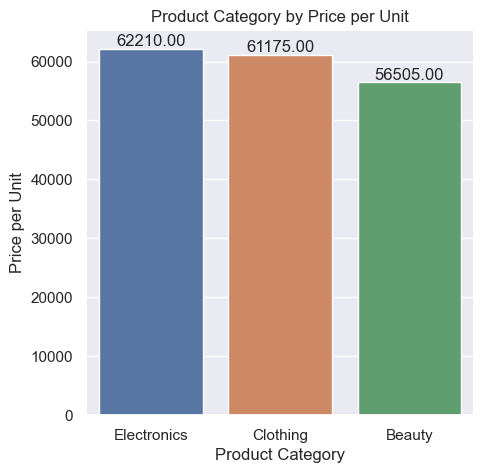

In [48]:
sales_gen = df.groupby(['Product Category'], as_index=False)['Price per Unit'].sum().sort_values(by='Price per Unit', ascending=False)

ax = sns.barplot(x = 'Product Category',y= 'Price per Unit' ,data = sales_gen)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
    
ax.set_title('Product Category by Price per Unit')

From above graph Electronics price per Unit is higher then the other products

Text(0.5, 1.0, 'Product Category by Total Amount')

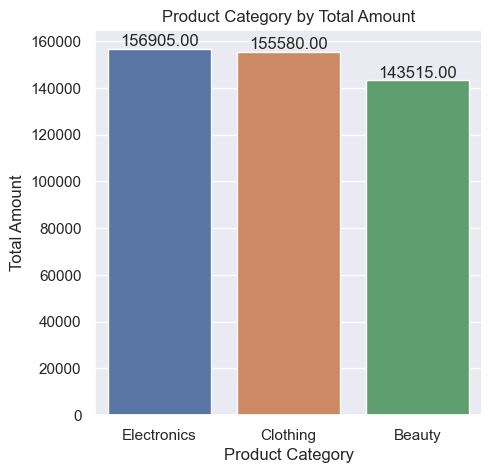

In [47]:
sales_gen = df.groupby(['Product Category'], as_index=False)['Total Amount'].sum().sort_values(by='Total Amount', ascending=False)

ax = sns.barplot(x = 'Product Category',y= 'Total Amount' ,data = sales_gen)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.title('Product Category by Total Amount')



From above graph 2023 Revanue generated by the Electronics products most 

Text(0.5, 1.0, 'Quantity sold by Product Category')

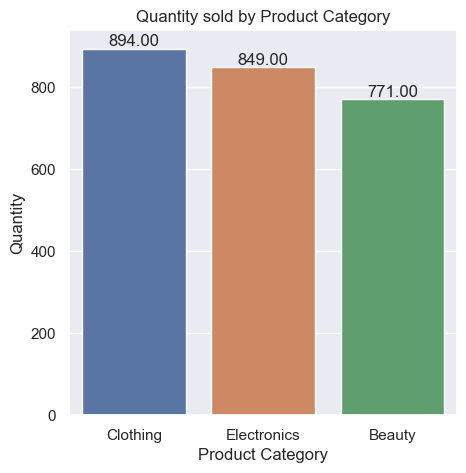

In [51]:
sales_gen = df.groupby(['Product Category'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)

ax = sns.barplot(x = 'Product Category',y= 'Quantity' ,data = sales_gen)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.title('Quantity sold by Product Category')

From above Graph Clothing category had the highest number of items sold.